In [16]:
from PIL import Image
from PIL import ImageFilter
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
# from keras.datasets import mnist
import pandas as pd
import my_app.processing as proc
from math import ceil
# from tensorflow.keras import datasets, layers, models
# from sklearn.preprocessing import LabelEncoder
# from keras.utils import np_utils
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
# from sklearn.utils import shuffle
# from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

# import tensorflow as tf
# from tensorflow.keras import layers
# keras = tf.keras
# AUTOTUNE = tf.data.experimental.AUTOTUNE ## tf.data transformation parameters

In [17]:
folders = os.popen("ls ../number_sets/numbers-master").read().split('\n')[:-1]
for i,img in enumerate(folders):
    folders[i]='../number_sets/numbers-master/'+img
folders=folders[:29]
# folders

In [64]:
# !rm new_traindata_numbermaster__FINALPASS.txt     Uncomment to overwrite file
arrays = []
labels = []
filenames = []
for folder in folders:
    for dig in [0,2,3,4,5,6,7,8,9]:
        direct = folder+'/'+str(dig)+'/'
        cmd = "ls " +direct
        imgs = os.popen(cmd).read().split('\n')[:-1]
        for i,img in enumerate(imgs):
            file = direct+img
            filenames.append(file)
            with open('new_traindata_numbermaster__FINALPASS.txt','a') as writeFile:
                answer=dig
                binary_arr,label_arr, segments,orig = proc.label_segments(file,'',photo=False,marker=False)
                found = binary_arr==0
                try:
                    x,y = np.where(found)
                    xmin,xmax,ymin,ymax = np.min(x),np.max(x),np.min(y),np.max(y)
                    xlen,ylen = found[xmin:xmax,ymin:ymax].shape
                    diff = np.abs(ylen-xlen)
                    change = ceil(diff/2)
                    if diff!=0:
                        if ylen>xlen:
                            xmin-=change
                            xmax+=change

                        else:
                            ymin-=change
                            ymax+=change

                        xlen,ylen = xmax-xmin,ymax-ymin
                        diff=np.abs(ylen-xlen)
                        if xlen>ylen: ymax+=diff
                        elif ylen>xlen: xmax+=diff
                    digit = 1-binary_arr[xmin:xmax,ymin:ymax]
                    digit = np.pad(digit,int(len(digit)*.2),mode= 'constant', constant_values=(0,0))                  
                    im = Image.fromarray(np.array(digit)*255.0).convert("RGB")
                    im.save('000.png')
                    del im
                    del digit
                    
                except:  #Takes care of tuple issue
                    src = cv2.imread(file, cv2.IMREAD_GRAYSCALE) 
                    image_file = 255-cv2.GaussianBlur(src,(5,5),cv2.BORDER_DEFAULT)
                    del src
                    yooo = Image.fromarray(image_file)
                    del image_file
                    yooo.save('000.png')   
                img = cv2.resize(cv2.imread('000.png',cv2.IMREAD_GRAYSCALE),(28,28),interpolation=cv2.INTER_CUBIC)
                arr = list(img.flatten())
                arr.append(int(answer))
                writeFile.write(str(arr)+';')
                del arr
                arrays.append(img)
                labels.append(int(answer))            

In [7]:
import shutil

In [15]:
for folder in folders:
    for dig in [0,2,3,4,5,6,7,8,9]:
        direct = folder+'/'+str(dig)+'/'
        cmd = "ls " +direct
        imgs = os.popen(cmd).read().split('\n')[:-1]
        uni=0
        writedir = 'unseen_set/'
        for i,img in enumerate(imgs):
            file = direct+img
            shutil.copy2(file,writedir+folder[-9:]+str(uni)+'____'+str(dig)+'.png')
            uni+=1                   

'0029_PL3M'

In [79]:
(X_tr,y_tr),(X_ts,y_ts) = mnist.load_data()

In [80]:
X_tr.shape

(60000, 28, 28)

In [81]:
np.array(arrays).shape

(15306, 28, 28)

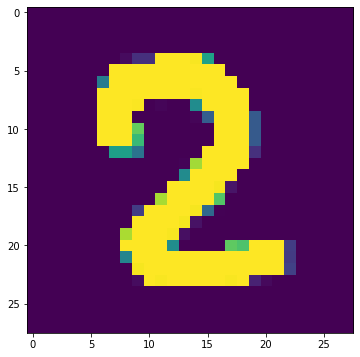

In [66]:
plt.imshow(arrays[100])

In [7]:
!ls saved_models
models = os.popen("ls saved_models").read().split('\n')[:-1]
tf_model = keras.models.load_model('saved_models/'+models[-1])

mnist_5epochs_20191028.h5  mnist_hasyv2_20epochs_201910291572394063.h5


In [67]:
newset = pd.DataFrame(filenames[:3000])
newset.columns = ['filename']
newset['label']=labels[:3000]
newset['array']=arrays[:3000]
newset

,filename,label,array
0,../number_sets/numbers-master/0001_CH4M/0/numb...,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,../number_sets/numbers-master/0001_CH4M/0/numb...,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,../number_sets/numbers-master/0001_CH4M/0/numb...,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,../number_sets/numbers-master/0001_CH4M/0/numb...,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,../number_sets/numbers-master/0001_CH4M/0/numb...,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...
2995,../number_sets/numbers-master/0007_CH3M/0/numb...,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2996,../number_sets/numbers-master/0007_CH3M/0/numb...,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2997,../number_sets/numbers-master/0007_CH3M/0/numb...,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2998,../number_sets/numbers-master/0007_CH3M/0/numb...,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [68]:
predictions = []
for LOC in range(len(newset)):
    predictions.append(np.argmax(tf_model.predict(newset.array.iloc[LOC].astype(float).flatten().reshape((1, 28, 28, 1)))))
    if LOC%300==0:
        print(LOC)
newset['predict']=predictions

0
300
600
900
1200
1500
1800
2100
2400
2700


In [69]:
newset['score']=(newset.label==newset.predict)*1
newset[['label','predict','score']]

,label,predict,score
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
2995,0,0,1
2996,0,0,1
2997,0,6,0
2998,0,0,1


In [71]:
newset.score.describe()

count    3000.000000
mean        0.844667
std         0.362283
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: score, dtype: float64

In [76]:
# binary_arr,label_arr, segments,orig = proc.label_segments(newset.filename.iloc[1157],'',photo=False,marker=False)
# plt.imshow(binary_arr)
# found = binary_arr==0
# x,y = np.where(found)
# xmin,xmax,ymin,ymax = np.min(x),np.max(x),np.min(y),np.max(y)
# xlen,ylen = found[xmin:xmax,ymin:ymax].shape
# diff = np.abs(ylen-xlen)
# change = ceil(diff/2)
# if diff!=0:
#     if ylen>xlen:
#         xmin-=change
#         xmax+=change

#     else:
#         ymin-=change
#         ymax+=change

#     xlen,ylen = xmax-xmin,ymax-ymin
#     diff=np.abs(ylen-xlen)
#     if xlen>ylen: ymax+=diff
#     elif ylen>xlen: xmax+=diff
# digit = 1-binary_arr[xmin:xmax,ymin:ymax]
# digit = np.pad(digit,int(len(digit)*.2),mode= 'constant', constant_values=(0,0))        
# plt.imshow(digit)

In [43]:
np.argmax(tf_model.predict(img.astype(float).flatten().reshape((1, 28, 28, 1))))

2

In [40]:
newset.iloc[100].filename

'../number_sets/numbers-master/0001_CH4M/2/number-440.png'

### HASYv2 DATASET

In [77]:
file = 'HASYv2/hasy-data-labels.csv'
df = pd.read_csv(file)
digits = df[(df['symbol_id']<=79) & (df['symbol_id']>=70)]
# digits 0-9
def make_pixel_array(df):
    im = Image.open('HASYv2/'+df['path'],'r').convert('L')
    return np.asarray(im)  ##255-val inverts colors
digits['pixels']=digits.apply(make_pixel_array,axis=1)
nrows = 28
ncolumns = 28
channels = 1
def read_process_images(img_list,y,invert=False):
    img_list,y = shuffle(img_list,y)
    X=[]
    for path in img_list:
        image = 'HASYv2/' + path       ##can do color .IMREAD_COLOR
        X.append(cv2.resize(cv2.imread(image,cv2.IMREAD_GRAYSCALE),(nrows,ncolumns),interpolation=cv2.INTER_CUBIC))
    if invert==True:
        return 255-np.array(X),np.array(y)
    return np.array(X),np.array(y)
X,y = read_process_images(digits['path'],digits['latex'],invert=True)

/home/nina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## JOIN HASYv2, MNIST, NEWSET

In [83]:
X_JOINED = np.concatenate((arrays,X_tr, X,X_ts), axis=0)
y_JOINED = np.concatenate((labels,y_tr, y,y_ts), axis=0)

In [86]:
FINALTRAINSET = pd.DataFrame(list(zip(X_JOINED,y_JOINED)))
FINALTRAINSET.columns = ['X','y']
FINALTRAINSET.to_csv('final_trainset.csv',index=None)

In [91]:
# sss = StratifiedShuffleSplit(1, train_size=0.8)
# sss.get_n_splits(X_JOINED, y_JOINED)
# X_train, X_test = sss.split(X_JOINED, y_JOINED)

1

## RETRAIN CNN MODEL

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_JOINED, y_JOINED,train_size=.8)

In [98]:
from keras import layers
from keras import models
from keras import optimizers
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [117]:
conv_model = models.Sequential()
conv_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.BatchNormalization())
conv_model.add(layers.Dropout(0.4))
conv_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2)))
conv_model.add(layers.BatchNormalization())
conv_model.add(layers.Dropout(0.4))
conv_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
conv_model.add(layers.Flatten())
conv_model.add(layers.Dense(256, activation = "relu"))
conv_model.add(layers.Dropout(0.4))
conv_model.add(layers.Dense(64, activation='relu'))
conv_model.add(layers.Dropout(0.4))
conv_model.add(layers.Dense(10, activation='softmax'))
# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
conv_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
x_train = X_train.astype('int32')
x_test = X_test.astype('int32')

y_train = y_train.astype('int32')
y_test = y_test.astype('int32')
x_train = np.array([x.reshape(28,28,1) for x in x_train])
x_test = np.array([x.reshape(28,28,1) for x in x_test])

In [124]:
##all data  COMMENT OUT AND RERUN ABOVE FOR TRAIN-TEST-SPLIT
x_train = np.array([x.astype('int32').reshape(28,28,1) for x in X_JOINED])
y_train = y_JOINED.astype('int32')

encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train = np_utils.to_categorical(y_train).astype('int32')

encoder = LabelEncoder()
encoder.fit(y_test)
encoded_y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(y_test).astype('int32')
conv_model.fit(x_train, dummy_y_train, batch_size=64, epochs=20)

Train on 86326 samples
Epoch 1/20
86326/86326 [==============================] - 71s 819us/sample - loss: 0.0832 - accuracy: 0.9745
Epoch 2/20
86326/86326 [==============================] - 73s 842us/sample - loss: 0.0793 - accuracy: 0.9750
Epoch 3/20
86326/86326 [==============================] - 70s 806us/sample - loss: 0.0787 - accuracy: 0.9754
Epoch 4/20
86326/86326 [==============================] - 69s 797us/sample - loss: 0.0772 - accuracy: 0.9757
Epoch 5/20
86326/86326 [==============================] - 67s 777us/sample - loss: 0.0778 - accuracy: 0.9764
Epoch 6/20
86326/86326 [==============================] - 67s 772us/sample - loss: 0.0752 - accuracy: 0.9763
Epoch 7/20
86326/86326 [==============================] - 70s 815us/sample - loss: 0.0744 - accuracy: 0.9766
Epoch 8/20
86326/86326 [==============================] - 74s 853us/sample - loss: 0.0717 - accuracy: 0.9776
Epoch 9/20
86326/86326 [==============================] - 77s 891us/sample - loss: 0.0726 - accuracy: 0.9

In [125]:
from datetime import datetime
saved_model_path = "./saved_models/mnist_hasyv2_master_20epochs_batch64__ALLDATA_{}.h5".format(datetime.now().strftime("%Y%m%d%s")) # _%H%M%S
# Save entire model to a HDF5 file
conv_model.save(saved_model_path)

In [126]:
!ls ./saved_models/

OSError: [Errno 12] Cannot allocate memory

In [120]:
def get_prediction(y):
    return np.argmax(y)
y_pred_prob = conv_model.predict(x_test.astype('float32'))
y_pred = np.array([get_prediction(y) for y in y_pred_prob])

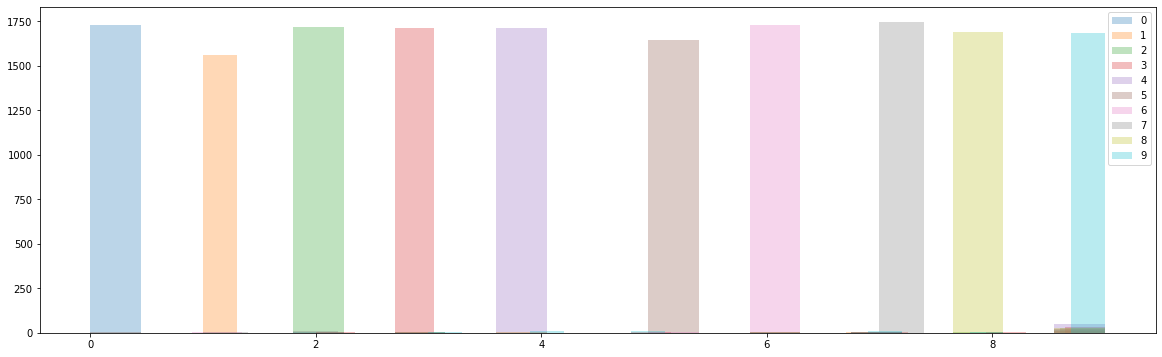

In [121]:
fig, ax = plt.subplots()
ax.hist(y_pred[y_test == 0], alpha=0.3, bins=20, label="0")
ax.hist(y_pred[y_test == 1], alpha=0.3, bins=20, label="1")
ax.hist(y_pred[y_test == 2], alpha=0.3, bins=20, label="2")
ax.hist(y_pred[y_test == 3], alpha=0.3, bins=20, label="3")
ax.hist(y_pred[y_test == 4], alpha=0.3, bins=20, label="4")
ax.hist(y_pred[y_test == 5], alpha=0.3, bins=20, label="5")
ax.hist(y_pred[y_test == 6], alpha=0.3, bins=20, label="6")
ax.hist(y_pred[y_test == 7], alpha=0.3, bins=20, label="7")
ax.hist(y_pred[y_test == 8], alpha=0.3, bins=20, label="8")
ax.hist(y_pred[y_test == 9], alpha=0.3, bins=20, label="9")
ax.legend()

In [122]:
results  = pd.DataFrame(y_test)
results.columns = ['actual']
results['predict']=y_pred
results['match']=(results['actual']==results['predict'])*1
results['match'].value_counts()

1    16922
0      344
Name: match, dtype: int64

In [109]:
16834/(16834+432)

0.9749797289470636

In [123]:
16922/(16922+344)

0.9800764508282173